/home/root123/.local/lib/python3.10/site-packages/setuptools/_distutils/_msvccompiler.py:12: UserWarning: _get_vc_env is private; find an alternative (pypa/distutils#340)
  warnings.warn(


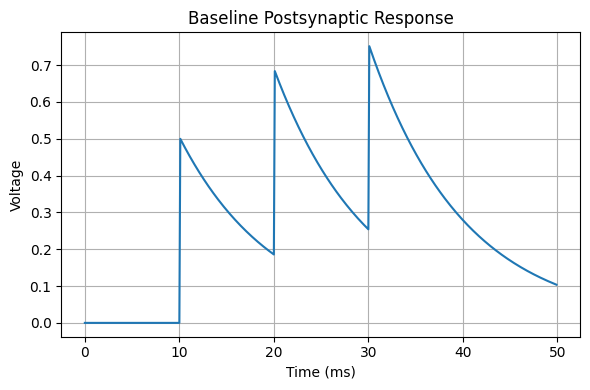

In [1]:
from brian2 import *
import matplotlib.pyplot as plt
import os

# Ensure figures folder exists
if not os.path.exists('../figures'):
    os.makedirs('../figures')

# Start a new simulation scope (resets any previous variables)
start_scope()

# -----------------------------
# Step 1: Presynaptic neuron
# -----------------------------
# Create a neuron that fires spikes at 10, 20, 30 ms
source = SpikeGeneratorGroup(1, [0, 0, 0], [10, 20, 30]*ms)

# -----------------------------
# Step 2: Postsynaptic neuron
# -----------------------------
# Leaky integrate-and-fire neuron
post = NeuronGroup(1, 
                   'dv/dt = -v/(10*ms):1',  # dv/dt = decay of voltage
                   threshold='v>1',         # spike threshold
                   reset='v=0',             # reset after spike
                   method='exact')

# -----------------------------
# Step 3: Synapse
# -----------------------------
# Each presynaptic spike adds 0.5 to postsynaptic voltage
S = Synapses(source, post, on_pre='v_post += 0.5')
S.connect()  # connect the single presynaptic neuron to postsynaptic

# -----------------------------
# Step 4: Recording
# -----------------------------
# Record postsynaptic voltage over time
M = StateMonitor(post, 'v', record=True)

# -----------------------------
# Step 5: Run simulation
# -----------------------------
run(50*ms)

# -----------------------------
# Step 6: Plot results
# -----------------------------
plt.figure(figsize=(6,4))
plt.plot(M.t/ms, M.v[0])
plt.xlabel('Time (ms)')
plt.ylabel('Voltage')
plt.title('Baseline Postsynaptic Response')
plt.grid(True)
plt.tight_layout()
plt.savefig('../figures/01_baseline_response.png')
plt.show()